OPTIMIZATION METHODS USED IN SYSTEMS OF DIFFERENTIAL EQUATION MODELS
====================================================================

In systems biology, mathematical models in the form of systems of differential equations are normally used in modelling biological systems. These systems of equations comes with alot of parameters that mostly are optimized to describe and interpret the biological process and the dynamics of the model.

Several optimization methods are used in the area of systems biology to help optimized these parameters to make biological meaning.These includes Constraint and non-constraint linear least squares, non-linear least squares and non-linear equations. (https://wiki.its.sfu.ca/research/datagroup/images/7/72/Global.pdf, https://www.hindawi.com/journals/jam/2018/9160793/) Other researchers have combine these methods and make improvements to solve their problems in their small specific area of studies. (Eg. Tailored parameter optimization methods for ordinary differential equation models with steady-state constraints, https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4994295/)

The optimization method that I am going to talk about in this report is the Least Squares and Equation solving because this method is widely used in systems of differential equation modeling. The method of least squares is a standard approach in regression analysis to approximate the solution of overdetermined systems (sets of equations in which there are more equations than unknowns) by minimizing the sum of the squares of the residuals made in the results of every single equation.
This method can be sud-dividen into four approaches: Constraint and non-constraint linear least squares and equations and Constraint and non-constraint non-linear least squares and equations. These methods Solve nonlinear least-squares problems and nonlinear systems of equations subject to bound constraints and linear least-squares problems subject to bound and linear constraints.

The linear least-square method uses Use linear least-squares solvers to fit a linear model to acquired data or to solve a system of linear equations, including when the parameters are subject to bound and linear constraints.

The non-linear least sqaures method also uses Use nonlinear least-squares solvers to fit a nonlinear model to acquired data or to solve a system of nonlinear equations, including when the parameters are subject to bound constraints.

Least squares method as all methods do have limitations. The common limitation of the least square optimization method is that the formulation considers only observational errors in the dependent variable.

Optimizing the parameters of a SIR model based on least squares.
======================================================

This example shows how the least square algorithm is used to optimize the fitting of and SIR model. The SIR is a diseases infectious model with S= the Suceptible population, I = the  Infected population and R = the Recovered population. In this example, if the SIR model is fit with 60 data points, the result is good and the fitted model curve is close to the data points till t=40. Least sqaures is then used to better fit the model.   

Data Importation
----------------------

In [3]:
ydata = ['1e-06', '1.49920166169172e-06', '2.24595472686361e-06', '3.36377954575331e-06', '5.03793663882291e-06', '7.54533628058909e-06', '1.13006564683911e-05', '1.69249500601052e-05', '2.53483161761933e-05', '3.79636391699325e-05', '5.68567547875179e-05', '8.51509649182741e-05', '0.000127522555808945', '0.000189928392105942', '0.000283447055673738', '0.000423064043409294', '0.000631295993246634', '0.000941024110897193', '0.00140281896645859', '0.00209085569326554', '0.00311449589149717', '0.00463557784224762', '0.00689146863803467', '0.010227347567051', '0.0151380084180746', '0.0223233100045688', '0.0327384810150231', '0.0476330618585758', '0.0685260046667727', '0.0970432959143974', '0.134525888779423', '0.181363340075877', '0.236189247803334', '0.295374180276257', '0.353377036130714', '0.404138746080267', '0.442876028839178', '0.467273954573897', '0.477529937494976', '0.475582401936257', '0.464137179474659', '0.445930281787152', '0.423331710456602', '0.39821360956389', '0.371967226561944', '0.345577884704341', '0.319716449520481', '0.294819942458255', '0.271156813453547', '0.24887641905719', '0.228045466022105', '0.208674420183194', '0.190736203926912', '0.174179448652951', '0.158937806544529', '0.144936441326754', '0.132096533873646', '0.120338367115739', '0.10958340819268', '0.099755679236243', '0.0907826241267504', '0.0825956203546979', '0.0751302384111894', '0.0683263295744258', '0.0621279977639921', '0.0564834809370572', '0.0513449852139111', '0.0466684871328814', '0.042413516167789', '0.0385429293775096', '0.035022685071934', '0.0318216204865132', '0.0289112368382048', '0.0262654939162707', '0.0238606155312519', '0.021674906523588', '0.0196885815912485', '0.0178836058829335', '0.0162435470852779', '0.0147534385851646', '0.0133996531928511', '0.0121697868544064', '0.0110525517526551', '0.0100376781867076', '0.00911582462544914', '0.00827849534575178', '0.00751796508841916', '0.00682721019158058', '0.00619984569061827', '0.00563006790443123', '0.00511260205894446', '0.00464265452957236', '0.00421586931435123', '0.00382828837833139', '0.00347631553734708', '0.00315668357532714', '0.00286642431380459', '0.00260284137520731', '0.00236348540287827', '0.00214613152062159', '0.00194875883295343']
ydata = [float(d) for d in ydata]
xdata = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101']
xdata = [float(t) for t in xdata]

In [4]:
from scipy.optimize import minimize
from scipy import integrate
import numpy as np
import pylab as pl


In [19]:
def fitFunc(sir_values, time, beta, gamma, k):
    s = sir_values[0]
    i = sir_values[1]
    r = sir_values[2]

    
    res = np.zeros((3))
    res[0] = - beta * s * i
    res[1] = beta * s * i - gamma * i
    res[2] = gamma * i
    return res

In [20]:
def lsq(model, xdata, ydata, n):
    """least squares"""
    time_total = xdata
    # original record data
    data_record = ydata
    # normalize train data
    k = 1.0/sum(data_record)
    # init t = 0 values + normalized
    I0 = data_record[0]*k
    S0 = 1 - I0
    R0 = 0 
    N0 = [S0,I0,R0]
    # Set initial parameter values
    param_init = [0.75, 0.75]
    param_init.append(k)
    # fitting
    param = minimize(sse(model, N0, time_total, k, data_record, n), param_init, method="nelder-mead").x
    # get the fitted model
    Nt = integrate.odeint(model, N0, time_total, args=tuple(param))
    # scale out
    Nt = np.divide(Nt, k)
    # Get the second column of data corresponding to I
    return Nt[:,1]

In [21]:
def sse(model, N0, time_total, k, data_record, n):
    """sum of square errors"""
    def result(x):
        Nt = integrate.odeint(model, N0, time_total[:n], args=tuple(x))
        INt = [row[1] for row in Nt]
        INt = np.divide(INt, k)
        difference = data_record[:n] - INt
        # square the difference
        diff = np.dot(difference, difference)
        return diff
    return result

result = lsq(fitFunc, xdata, ydata, 60)

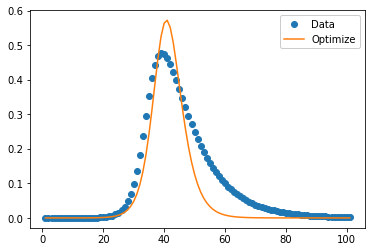

In [22]:
# Plot data and fit
pl.clf()
pl.plot(xdata, ydata, "o",label='Data')
pl.plot(xdata, result,label='Optimize')
pl.legend(framealpha=1, frameon=True);
pl.show()

The $ydata$ are infected data. The showing orange curve is the fitted model.  the model fitted  with the  $ydata$, gives  a curve (fitted model) close to the $ydata$. The $ydata$ have from $t=40$ to maybe $t=60$ maybe high error values (calculated by sum of sqaure errors).